# Titanic Data Dictionary

* Survived : 0 = 사망, 1 = 생존
* Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등
* Sex : male = 남성, female = 성
* Age : 나이
* SibSp : 타이타닉 호에 동승한 자매 / 배우 의 수
* Parch : 타이타닉 호에 동승한 부모 / 식의 수
* Ticket : 티켓 번호
* Fare : 승객 요금
* Cabi : 방 호수
* Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, ain.head() S = 사우샘프턴

In [56]:
import pandas as pd

In [57]:
df = pd.read_csv("titanic.csv")

## I. DataFrame 데이터 탐색

In [58]:
# 1.생존자 중 몇 명인지 계산하세요.
# "Survived" 열의 값이 1인 행의 개수를 세어서 출력
survived_count = df[df['Survived'] == 1].shape[0]
print("생존자 수:", survived_count)

생존자 수: 342


In [59]:
# 2.항구 "S"에서 탑승한 승객 수를 계산하세요.
# "Embarked" 열의 값이 "S"인 행의 개수를 세어서 출력
s_embarked_count = df[df['Embarked'] == 'S'].shape[0]
print("항구 'S'에서 탑승한 승객 수:", s_embarked_count)

항구 'S'에서 탑승한 승객 수: 644


In [60]:
# 3.남성 승객 수를 계산하세요.
# "Sex" 열의 값이 "male"인 행의 개수를 세어서 출력
male_passenger_count = df[df['Sex'] == 'male'].shape[0]
print("남성 승객 수:", male_passenger_count)

남성 승객 수: 577


In [61]:
# 4.3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수를 계산하세요.
# "Pclass" 열의 값이 "3" 중 지불한 요금이 40.000 미만인 행의 개수를 세어서 출력
third_class_low_fare_count = df[(df['Pclass'] == 3) & (df['Fare'] < 40.000)].shape[0]
print("3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수:", third_class_low_fare_count)

3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수: 471


In [62]:
# 5.승객 ID가 674인 승객의 이름을 찾아서 출력
passenger_name = df[df['PassengerId'] == 674]['Name'].values[0]
print("승객 ID가 674인 승객의 이름:", passenger_name)

승객 ID가 674인 승객의 이름: Wilhelms, Mr. Charles


In [63]:
# 6.승객들의 평균 나이를 계산하세요.
# "Age" 열의 평균값을 계산하여 출력
average_age = df['Age'].mean()
print("승객들의 평균 나이:", average_age)

승객들의 평균 나이: 29.69911764705882


In [64]:
# 7.생존자와 사망자의 수를 각각 계산하세요.
# "Sex" 열의 값이 "male"인 행의 개수를 세어서 남성 승객 수를 출력
male_passenger_count = df[df['Sex'] == 'male'].shape[0]
print("남성 승객 수:", male_passenger_count)

# "Sex" 열의 값이 "female"인 행의 개수를 세어서 여성 승객 수를 출력
female_passenger_count = df[df['Sex'] == 'female'].shape[0]
print("여성 승객 수:", female_passenger_count)

남성 승객 수: 577
여성 승객 수: 314


In [65]:
# 8.남성과 여성 승객 수를 계산하세요.
# "Survived" 열의 값이 1인 행의 개수를 세어서 생존자 수를 출력
survived_count = df[df['Survived'] == 1].shape[0]
print("생존자 수:", survived_count)

# "Survived" 열의 값이 0인 행의 개수를 세어서 사망자 수를 출력
dead_count = df[df['Survived'] == 0].shape[0]
print("사망자 수:", dead_count)

생존자 수: 342
사망자 수: 549


In [66]:
# 9.각 성별에 따른 생존자와 사망자의 수를 계산하세요.[DataFrame. groupby() 함수 이용]
# 성별에 따른 생존자와 사망자의 수를 계산하여 출력
survival_by_gender = df.groupby('Sex')['Survived'].value_counts().unstack()
print(survival_by_gender)

Survived    0    1
Sex               
female     81  233
male      468  109


In [67]:
# 10.각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요[(DataFrame.pivot_table() 함수 이용)
# 각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하여 출력
pivot_table = df.pivot_table(index='Pclass', columns='Survived', values='Fare', aggfunc='mean')
print(pivot_table)

Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


## II. DataFrame 데이터 시각화

In [68]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

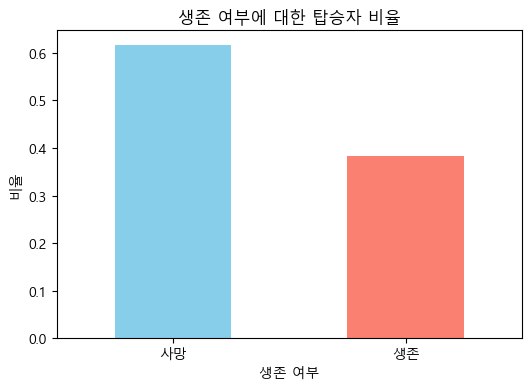

In [69]:

# 1.탑승자의 생존 여부에 대한 비율을 계산하고, 이 비율을 막대 그래프로 시각화.
# 생존자와 사망자의 수를 세기
survived_count = df['Survived'].value_counts()

# 생존자와 사망자의 비율 계산
survival_ratio = survived_count / len(df)

# 막대 그래프로 시각화
plt.figure(figsize=(6, 4))
survival_ratio.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('생존 여부에 대한 탑승자 비율')
plt.xlabel('생존 여부')
plt.ylabel('비율')
plt.xticks([0, 1], ['사망', '생존'], rotation=0)
plt.show()


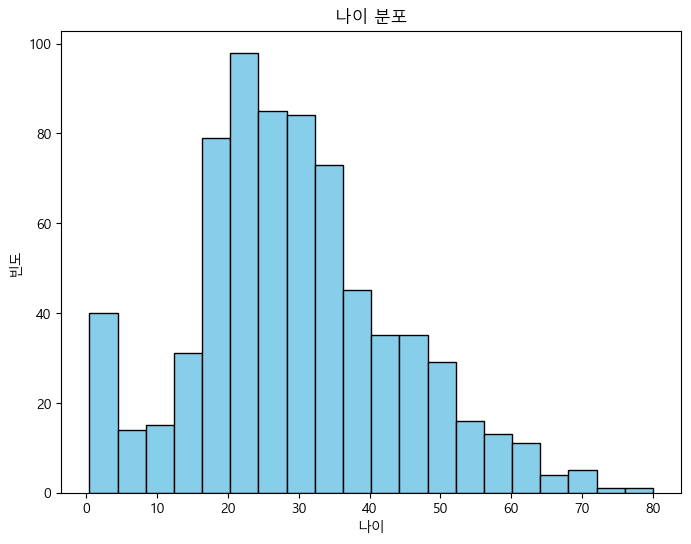

In [70]:
# 2.나이 열의 분포를 20개의 구간(bin)으로 나누어 히스토그램으로 시각화
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()


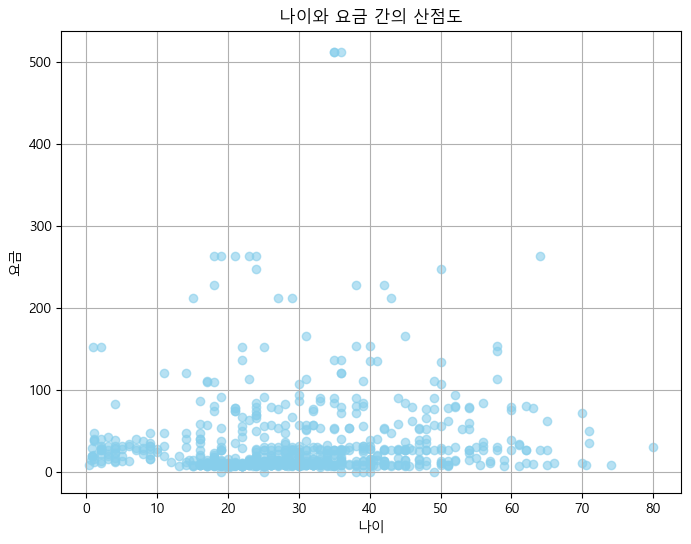

In [71]:
# 3.나이와 요금 간의 산점도 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], color='skyblue', alpha=0.6)
plt.title('나이와 요금 간의 산점도')
plt.xlabel('나이')
plt.ylabel('요금')
plt.grid(True)
plt.show()


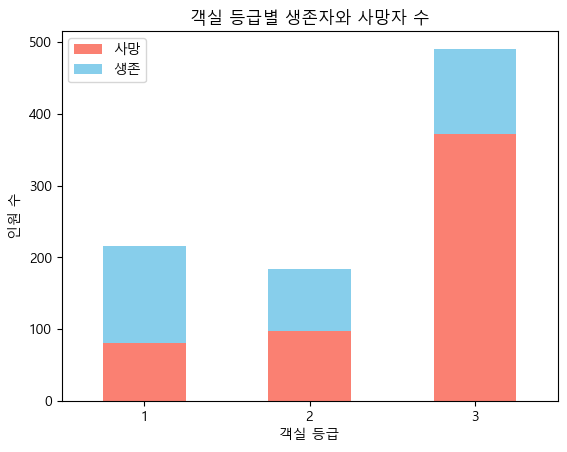

In [72]:
# 4.객실 등급(Pclass)별로 생존자와 사망자 수를 막대그래프로 시각화.
survival_by_class = df.groupby('Pclass')['Survived'].value_counts().unstack()

# 막대 그래프로 시각화
survival_by_class.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title('객실 등급별 생존자와 사망자 수')
plt.xlabel('객실 등급')
plt.ylabel('인원 수')
plt.xticks(rotation=0)
plt.legend(['사망', '생존'])
plt.show()